In [1]:
# pip install keras_preprocessing

In [4]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [5]:
from keras.utils import to_categorical
from keras_preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd
import numpy as np

In [6]:
TRAIN_DIR = 'archive/images/train/'
TEST_DIR = 'archive/images/test/'

In [7]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths,labels


In [8]:
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [9]:
print(train)

                                       image     label
0           archive/images/train/angry\0.jpg     angry
1           archive/images/train/angry\1.jpg     angry
2          archive/images/train/angry\10.jpg     angry
3       archive/images/train/angry\10002.jpg     angry
4       archive/images/train/angry\10016.jpg     angry
...                                      ...       ...
5433  archive/images/train/surprise\9969.jpg  surprise
5434  archive/images/train/surprise\9985.jpg  surprise
5435  archive/images/train/surprise\9990.jpg  surprise
5436  archive/images/train/surprise\9992.jpg  surprise
5437  archive/images/train/surprise\9996.jpg  surprise

[5438 rows x 2 columns]


In [10]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [11]:
print(test)
print(test['image'])

                                       image     label
0        archive/images/test/angry\10052.jpg     angry
1        archive/images/test/angry\10065.jpg     angry
2        archive/images/test/angry\10079.jpg     angry
3        archive/images/test/angry\10095.jpg     angry
4        archive/images/test/angry\10121.jpg     angry
...                                      ...       ...
2098  archive/images/test/surprise\30625.jpg  surprise
2099  archive/images/test/surprise\30628.jpg  surprise
2100  archive/images/test/surprise\30714.jpg  surprise
2101  archive/images/test/surprise\31005.jpg  surprise
2102  archive/images/test/surprise\31054.jpg  surprise

[2103 rows x 2 columns]
0          archive/images/test/angry\10052.jpg
1          archive/images/test/angry\10065.jpg
2          archive/images/test/angry\10079.jpg
3          archive/images/test/angry\10095.jpg
4          archive/images/test/angry\10121.jpg
                         ...                  
2098    archive/images/test/surpr

In [12]:
from tqdm.notebook import tqdm

In [13]:
pip install pillow

Note: you may need to restart the kernel to use updated packages.


In [14]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image,color_mode = "grayscale" )
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features),48,48,1)
    return features
    

In [15]:
train_features = extract_features(train['image']) 

  0%|          | 0/5438 [00:00<?, ?it/s]

In [16]:
test_features = extract_features(test['image'])

  0%|          | 0/2103 [00:00<?, ?it/s]

In [17]:
x_train = train_features/255.0
x_test = test_features/255.0

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [20]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [21]:
y_train = to_categorical(y_train,num_classes = 7)
y_test = to_categorical(y_test,num_classes = 7)

In [22]:
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(7, activation='softmax'))

c:\Users\admin\Downloads\pytho deep learning\.conda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [21]:
model.compile(optimizer = 'adam', 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'] )

In [ ]:
model.fit(x= x_train,y = y_train, batch_size = 128, epochs = 15
          , validation_data = (x_test,y_test))

In [52]:
model_json = model.to_json()
with open("emotiondetector.json",'w') as json_file:
    json_file.write(model_json)
model.save("emotiondetector.keras")

## model_json = model.to_json()
with open("emotiondetector.json",'w') as json_file:
    json_file.write(model_json)
model.save("emotiondetector.keras")

In [24]:
from keras.models import model_from_json

In [25]:
json_file = open("emotiondetector.json", "r")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
model.load_weights("emotiondetector.keras")

In [26]:
label = ['angry','disgust','fear','happy','neutral','sad','surprise']

In [27]:
def ef(image):
    img = load_img(image,grayscale =  True )
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0
    

In [28]:
image = 'archive/images/test/angry/10052.jpg'
print("original image is of angry")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)

original image is of angry


c:\Users\admin\Downloads\pytho deep learning\.conda\Lib\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step
model prediction is  angry


In [57]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [29]:
import matplotlib.pyplot as plt

original image is of angry
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step

c:\Users\admin\Downloads\pytho deep learning\.conda\Lib\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
model prediction is  angry


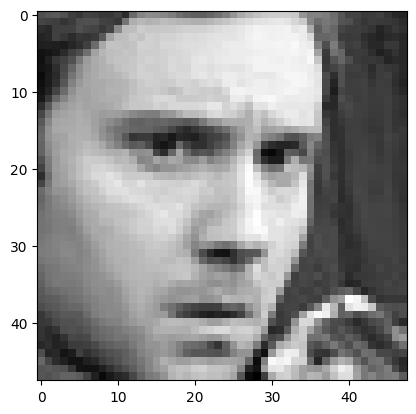

In [30]:
image = 'archive/images/train/angry/0.jpg'
print("original image is of angry")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of fear
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
model prediction is  neutral


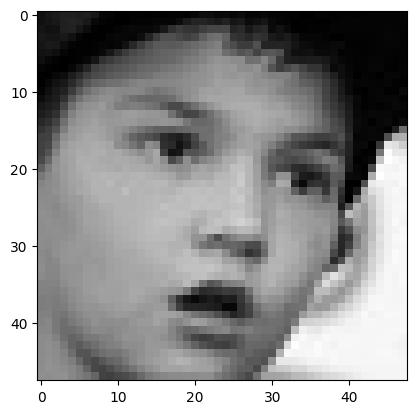

In [31]:
image = 'archive/images/test/fear/101.jpg'
print("original image is of fear")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of disgust
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
model prediction is  disgust


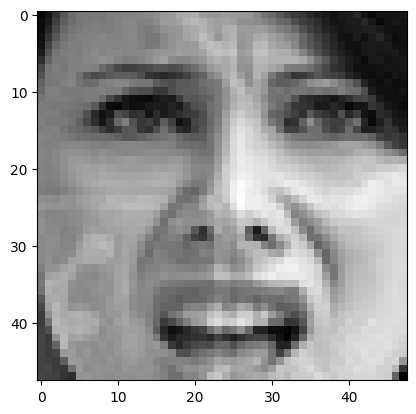

In [32]:
image = 'archive/images/test/disgust/533.jpg'
print("original image is of disgust")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of happy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
model prediction is  sad


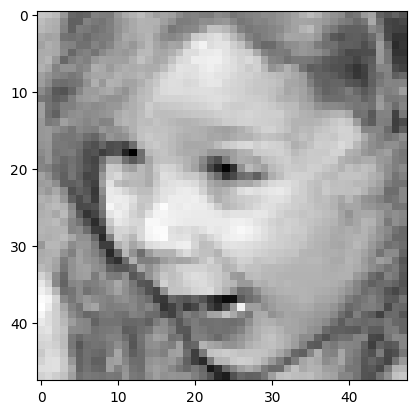

In [33]:
image = 'archive/images/test/happy/139.jpg'
print("original image is of happy")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of surprise
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
model prediction is  fear


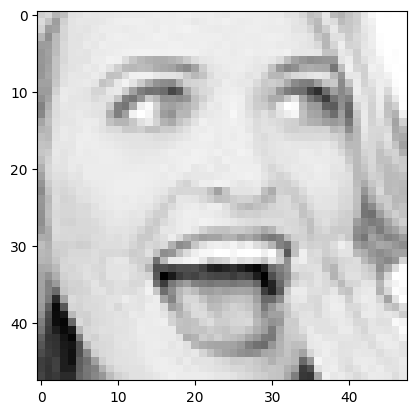

In [34]:
image = 'archive/images/test/surprise/15518.jpg'
print("original image is of surprise")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')